# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
#I seperated all random points from only points over land and ran seperate analysis on both
#The idea being that if temperatures do increase towrd the equator it would be the same
#for both ocean and land temperatures.
#Max temperatures appear to be around the 23rd latitude, which is likely due to the time of year.
#Additional panel data and more precise definitions of warmer would likely be needed to fully verify.
#Simple linear methods show no strong correlation between latitude and temp, but linear models are weak for weather data
#The graphs however show some trends that might be uncovered with other methods

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy.core as owm
import seaborn as sns
from scipy.stats import linregress, shapiro, normaltest

# Import API key
from api_keys import api_key
settings = {"units": "metric", "appid": api_key}
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

#Weather API Variables
w_url = 'https://api.openweathermap.org/data/2.5/weather'

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
city_name = []
clouds =[]
#date=[]
humidity=[]
max_temp =[]
min_temp=[]
wind_spd =[]
lat =[]
lon =[]

# Create a set of random lat and lng combinations
# Hi Dayanara - the graphs look way better when the size below is big, but it takes one second
#    per call in the API. So it can take a while to run when it looks it's best.
#    set size = 1000 for speed, but look at the saved graphs to see what the larger set looks like.
lats = np.random.uniform(low=-90.000, high=90.000, size=10_000)#set to 1000 for speed
lngs = np.random.uniform(low=-180.000, high=180.000, size=10_000)#set to 1000 for speed
lat_lngs = zip(lats, lngs)

# Doing the call srtaight to owm to skip the missing cities stuff
for i,lat_lng in enumerate(lat_lngs):
    req = owm.get_current(lat_lng,**settings)
    if req['name']=='':
        city_name.append('Ocean')
    else:
        city_name.append(req['name'])
    clouds.append(req['clouds']['all'])
    #date.append(req['dt'])
    humidity.append(req['main']['humidity'])
    max_temp.append(req['main']['temp_max'])
    min_temp.append(req['main']['temp_min'])
    wind_spd.append(req['wind']['speed'])
    lat.append(lat_lng[0])
    lon.append(lat_lng[1])


# Print the city count to confirm sufficient count
weather_dict = {
    'city':city_name,
    'cloudiness':clouds,
    #'date':date,
    'humidity':humidity,
    'max_temp':max_temp,
    'min_temp':min_temp,
    'wind_speed':wind_spd,
    'lat':lat,
    'lon':lon
    
}

all_weather_df = pd.DataFrame(weather_dict)
land_weather_df = all_weather_df.loc[all_weather_df['city']!="Ocean"]
print('count of all datapoints:' + str(len(all_weather_df)))
print('count of land datapoints:' + str(len(land_weather_df)))
all_weather_df.head()

count of all datapoints:10000
count of land datapoints:2692


,city,cloudiness,humidity,max_temp,min_temp,wind_speed,lat,lon
0,Ocean,99,98,-53.95,-53.95,10.74,-87.958349,179.346973
1,Ocean,87,87,-1.35,-1.35,8.73,-62.053457,-66.753138
2,Ocean,79,81,25.35,25.35,6.47,30.771168,163.650596
3,Ocean,65,87,1.35,1.35,5.46,87.379005,-151.048389
4,Kujalleq,93,87,4.85,4.85,5.43,60.565560,-46.516235


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#I did thing a little different, but the above cell shows the count and the dataframe header

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
all_weather_df.head()

,city,cloudiness,humidity,max_temp,min_temp,wind_speed,lat,lon
0,Ocean,99,98,-53.95,-53.95,10.74,-87.958349,179.346973
1,Ocean,87,87,-1.35,-1.35,8.73,-62.053457,-66.753138
2,Ocean,79,81,25.35,25.35,6.47,30.771168,163.650596
3,Ocean,65,87,1.35,1.35,5.46,87.379005,-151.048389
4,Kujalleq,93,87,4.85,4.85,5.43,60.565560,-46.516235


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

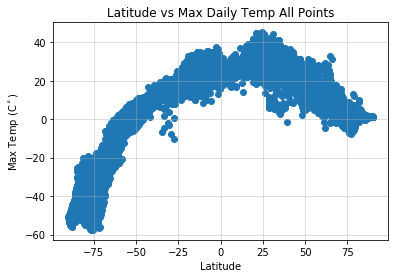

In [20]:
plt.scatter(all_weather_df['lat'], all_weather_df['max_temp'])
plt.title('Latitude vs Max Daily Temp All Points')
plt.ylabel('Max Temp (C$^\circ$)')
plt.xlabel('Latitude')
plt.grid(True, alpha=0.50)
plt.savefig('Lat vs Max Temp All')

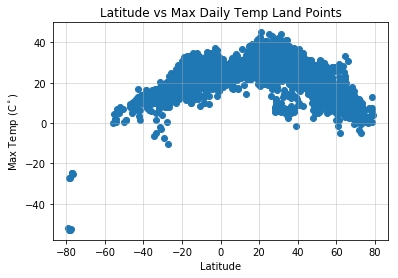

In [21]:
plt.scatter(land_weather_df['lat'], land_weather_df['max_temp'])
plt.title('Latitude vs Max Daily Temp Land Points')
plt.ylabel('Max Temp (C$^\circ$)')
plt.xlabel('Latitude')
plt.grid(True, alpha=0.50)
plt.savefig('Lat vs Max Temp Land')

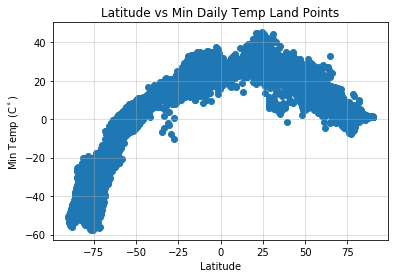

In [22]:
plt.scatter(all_weather_df['lat'], all_weather_df['min_temp'])
plt.title('Latitude vs Min Daily Temp Land Points')
plt.ylabel('Min Temp (C$^\circ$)')
plt.xlabel('Latitude')
plt.grid(True, alpha=0.50)
plt.savefig('Lat vs Min Temp All')

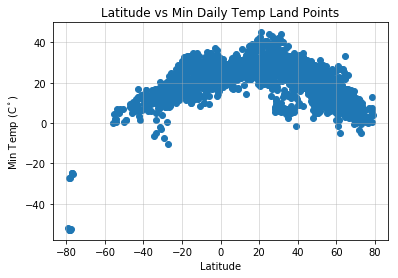

In [23]:
plt.scatter(land_weather_df['lat'], land_weather_df['min_temp'])
plt.title('Latitude vs Min Daily Temp Land Points')
plt.ylabel('Min Temp (C$^\circ$)')
plt.xlabel('Latitude')
plt.grid(True, alpha=0.50)
plt.savefig('Lat vs Min Temp Land')

#### Latitude vs. Humidity Plot

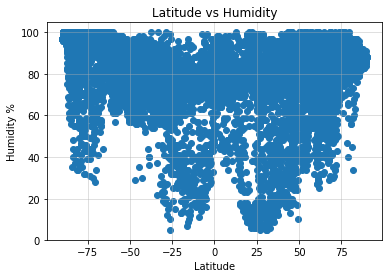

In [26]:
all_weather_df = all_weather_df[all_weather_df['humidity']<=100]
plt.scatter(all_weather_df['lat'], all_weather_df['humidity'])
plt.title('Latitude vs Humidity')
plt.ylabel('Humidity %')
plt.xlabel('Latitude')
plt.grid(True, alpha=0.50)
plt.savefig('Lat vs Humidity All')

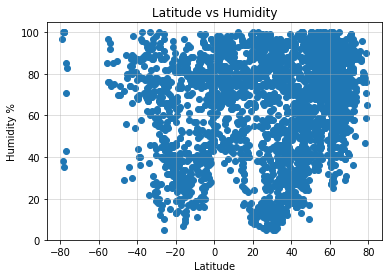

In [28]:
land_weather_df = land_weather_df[land_weather_df['humidity']<=100]
plt.scatter(land_weather_df['lat'], land_weather_df['humidity'])
plt.title('Latitude vs Humidity')
plt.ylabel('Humidity %')
plt.xlabel('Latitude')
plt.grid(True, alpha=0.50)
plt.savefig('Lat vs Humidity Land')

#### Latitude vs. Cloudiness Plot

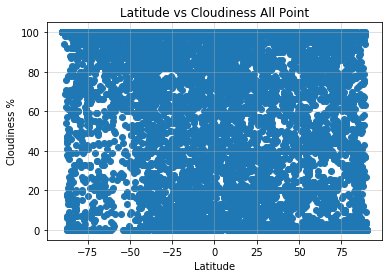

In [29]:
plt.scatter(all_weather_df['lat'], all_weather_df['cloudiness'])
plt.title('Latitude vs Cloudiness All Point')
plt.ylabel('Cloudiness %')
plt.xlabel('Latitude')
plt.grid(True, alpha=0.50)
plt.savefig('Lat vs Clouds All')

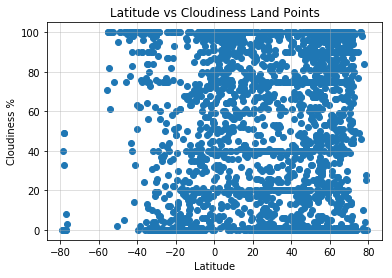

In [30]:
plt.scatter(land_weather_df['lat'], land_weather_df['cloudiness'])
plt.title('Latitude vs Cloudiness Land Points')
plt.ylabel('Cloudiness %')
plt.xlabel('Latitude')
plt.grid(True, alpha=0.50)
plt.savefig('Lat vs Clouds Land')

#### Latitude vs. Wind Speed Plot

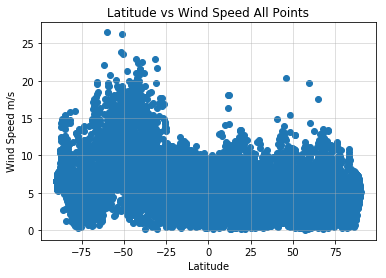

In [31]:
plt.scatter(all_weather_df['lat'], all_weather_df['wind_speed'])
plt.title('Latitude vs Wind Speed All Points')
plt.ylabel('Wind Speed m/s')
plt.xlabel('Latitude')
plt.grid(True, alpha=0.50)
plt.savefig('Lat vs Wind Speed All')

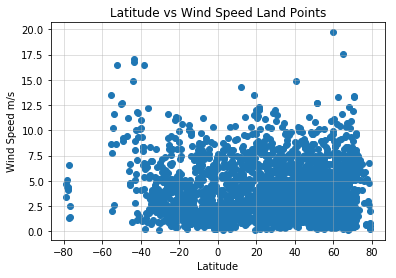

In [32]:
plt.scatter(land_weather_df['lat'], land_weather_df['wind_speed'])
plt.title('Latitude vs Wind Speed Land Points')
plt.ylabel('Wind Speed m/s')
plt.xlabel('Latitude')
plt.grid(True, alpha=0.50)
plt.savefig('Lat vs Wind Speed Land')

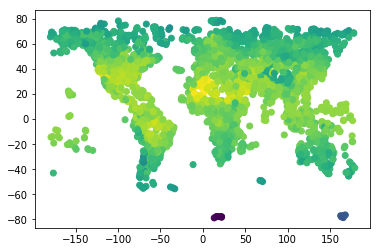

In [33]:
#You can see that the middle is warmer, but generallt further north of the equator. Since we're looking at 
#current weather data this is likely becasue of the time of year (i.e. the sun is up north right now)
#if we had more time some kind time weighted average would be cool
color = land_weather_df['max_temp']
plt.scatter(land_weather_df['lon'], land_weather_df['lat'], c=color )
plt.savefig('Lat vs World Map Land')

In [39]:
#shows our data are normal, so regular methods are cool
stat,p = normaltest(all_weather_df['max_temp'])
p

0.0

In [37]:
#test all the data points, using abolute value of lat should tell us if geting closer to the equator matters
#bascially it's a maybe and we should probably use something other than linear models
test_vars = ['max_temp', 'min_temp', 'humidity', 'cloudiness','wind_speed']
for t_var in test_vars:
    results = linregress(abs(all_weather_df['lat']), all_weather_df[t_var])
    print(results)
    

LinregressResult(slope=-0.6353601653289094, intercept=36.97915226438964, rvalue=-0.768649897331621, pvalue=0.0, stderr=0.005288254505196287)
LinregressResult(slope=-0.6347594148929494, intercept=36.849979131291576, rvalue=-0.7708803664502191, pvalue=0.0, stderr=0.005245816379764722)
LinregressResult(slope=0.24854185275989651, intercept=65.99552217110994, rvalue=0.34604164699894896, pvalue=3.080192957647221e-279, stderr=0.006739700681030849)
LinregressResult(slope=0.21688989488146382, intercept=49.33642642797818, rvalue=0.14112222561980678, pvalue=1.2051329831638232e-45, stderr=0.015217412718717169)
LinregressResult(slope=0.003512858007570497, intercept=6.0518589670822145, rvalue=0.024704762938403423, pvalue=0.013495414797447043, stderr=0.0014217148110517352)


In [38]:
#test all the data points, using abolute value of lat should tell us if geting closer to the equator matters
#bascially it's a maybe and we should probably use something other than linear models
print(len(land_weather_df))
for t_var in test_vars:
    results = linregress(abs(land_weather_df['lat']), land_weather_df[t_var])
    print(results)

2691
LinregressResult(slope=-0.2718864151124574, intercept=30.318550386558854, rvalue=-0.5855594690787091, pvalue=1.7482370351625478e-247, stderr=0.007258443114039827)
LinregressResult(slope=-0.27609630070316166, intercept=30.091951307585774, rvalue=-0.6072470871975487, pvalue=5.958477960224454e-271, stderr=0.006966277610013004)
LinregressResult(slope=0.21114462772569878, intercept=57.678904126400035, rvalue=0.17866647429478255, pvalue=9.703749258260045e-21, stderr=0.0224231595973808)
LinregressResult(slope=0.10092572408641914, intercept=43.95001131172916, rvalue=0.05374608010104195, pvalue=0.005290533171859429, stderr=0.03616025709455146)
LinregressResult(slope=0.01087736267254226, intercept=3.5084099594797826, rvalue=0.08612337550695102, pvalue=7.681442561544608e-06, stderr=0.0024265571795640145)


0.0